In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px grey solid !important;
  color: white !important;
}
</style>

In [4]:
import os
import re
import emoji
import demoji
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# processing of text
from preprocessing import Preprocessing
from text_for_plot_functions import extract_emoticons, create_dataframe_emoji_comparison, clean_text_emoji

#plot
from plot_functions import plot_word_cloud, count_plot_words
from stopwords import stopwords
from model_functions import split_train_val_test


In [5]:
# setting display
pd.options.mode.chained_assignment = None
pd.options.display.max_colwidth = 300
pd.set_option("display.colheader_justify","left")
%matplotlib inline

## load and download only for the first time
# demoji.download_codes()

In [43]:
data = Preprocessing()
data.load_data()
data.conected_data.iloc[150:200]

,Comment,Kind of offensive language
150,@anonymized_account @anonymized_account @anonymized_account @anonymized_account Wonder!! Chyba cię....😁😁😁😁😁.No dobra. Na jaki?😁😁😁,0
151,"@anonymized_account Ja mam uczulenie na dobrą zmianę, ale to dłuższa historiac",0
152,"@anonymized_account Różnicy nie ma, bo pisali wtedy, że nie można zsyłać zawodników do rezerw ;P",0
153,@anonymized_account Żal ci biedaku??? Gdyby nie Kaczyński to by je twoi przyjaciele z PO rozkradl,1
154,RT @anonymized_account @anonymized_account Żal ci biedaku??? Gdyby nie Kaczyński to by je twoi przyjaciele z PO rozkradl,1
155,Dobry dzień na przypomnienie sobie genezy gwiazdek na fladze #UE #deklaracjaRzymska,0
156,"Sekta kurwa, jakaś niepojęta radość, każde konto pisdzielskie tylko o jednym",1
157,"@anonymized_account @anonymized_account Nie wierzę, bez zaświadczenia od proboszcza?",0
158,@anonymized_account I chyba wtedy byś niezaprzeczyla?,0
159,@anonymized_account Tak naprawdę czy będziemy w spadkowej czy mistrzowskiej to i tak czekają nas sparingi.,0


In [7]:
data.conected_data['Kind of offensive language'].value_counts().to_frame()\
    .rename_axis('Response', axis=1).style.set_properties(
        **{'color': 'white !important',
           'border': '1px grey solid !important',
           'text-align': 'center'}
        ).set_table_styles([{
            'selector': 'th',
            'props': [('border', '1px grey solid !important')]
        }])

Response,Kind of offensive language
0,10056
1,3255
2,78


In [8]:
data.remove_quoting_comments()
conected_data = pd.concat([data.x_raw, data.y], axis=1)

In [9]:
# prepare to function to extract emoji to dict
emoji_for_response_0 = []
emoji_for_response_1 = []
emoji_for_response_2 = []

conected_data['Emoticons'], conected_data['Number of emoticons in comment'] = \
    zip(*conected_data[['Comment', 'Kind of offensive language']].apply(\
                                       extract_emoticons, axis=1,
                                       args=(emoji_for_response_0,
                                            emoji_for_response_1,
                                            emoji_for_response_2)))

dict_count_emoji_0 = dict((i, emoji_for_response_0.count(i)) for i in
                          emoji_for_response_0)
dict_count_emoji_1 = dict((i, emoji_for_response_1.count(i)) for i in
                          emoji_for_response_1)
dict_count_emoji_2 = dict((i, emoji_for_response_2.count(i)) for i in
                          emoji_for_response_2)

In [10]:
# count how many times emoji occurs in dataset
plot_emoticons = create_dataframe_emoji_comparison(dict_count_emoji_0,
                                                   dict_count_emoji_1,
                                                   dict_count_emoji_2,
                                                   ['Response_0', 'Response_1'])
plot_emoticons

,Response_0,Response_1,Response_2
emoji,,,
😁,850.0,67.0,3.0
:),743.0,42.0,NaN
😂,626.0,33.0,NaN
xd,199.0,6.0,NaN
😀,167.0,9.0,NaN
😉,161.0,NaN,NaN
;-),127.0,1.0,NaN
:d,93.0,3.0,NaN
;),88.0,10.0,NaN


In [11]:
# emoji in comments with punishable threats 
conected_data[(conected_data['Kind of offensive language'] == 2) 
              & (conected_data['Number of emoticons in comment']>0)]

,Comment,Kind of offensive language,Emoticons,Number of emoticons in comment
1472,"@anonymized_account @anonymized_account Jaka tv, tacy idole😁😁😁 A tak trochę poważniej, to za tę napaść na dziewczynkę to tylko w ten pedalski ryj.",2,😁,3
1949,"@anonymized_account Zamknij niemiecki ryj,siedź w tej Brukseli i nie wracaj złodzieju!😬😬😬",2,😬,3


In [12]:
# prepare data to present result
data.demojize()
data.clean_text()

conected_data = pd.concat([data.x_raw, data.y], axis=1)

# remove emoji(as text)
conected_data['Comment'] = clean_text_emoji(conected_data['Comment'])

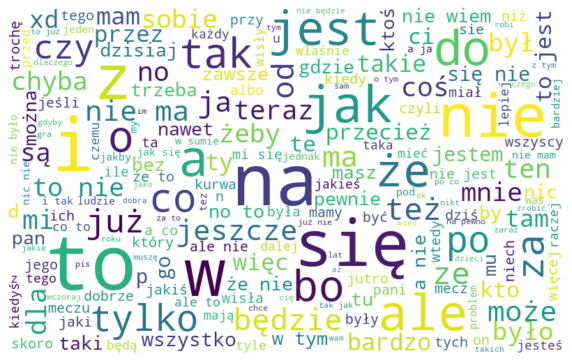

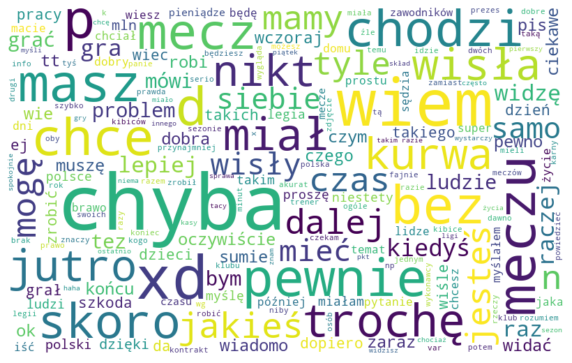

In [14]:
# visualizing which of the word is most commonly used in normal speech
kind_0 = conected_data[conected_data['Kind of offensive language']==0]
plot_word_cloud(kind_0)
plot_word_cloud(kind_0, stopwords=stopwords)

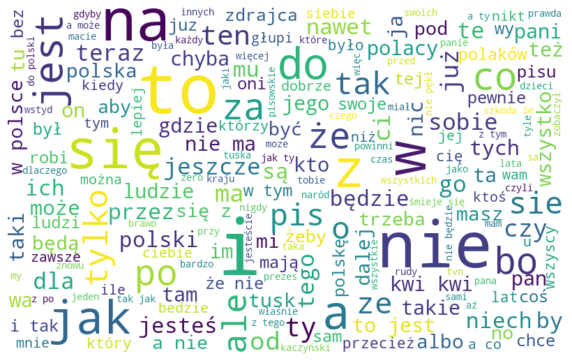

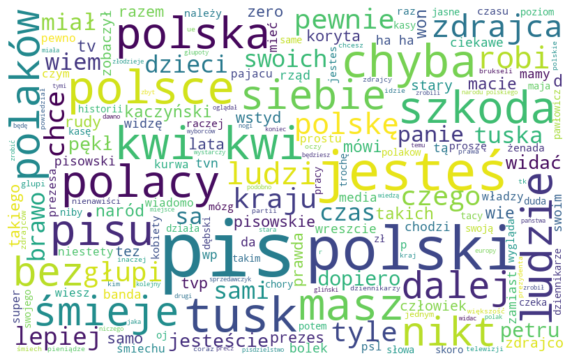

In [15]:
# visualizing which of the word is most commonly used in hate speech
kind_1 = conected_data[conected_data['Kind of offensive language']==1]
plot_word_cloud(kind_1)
plot_word_cloud(kind_1, stopwords=stopwords)

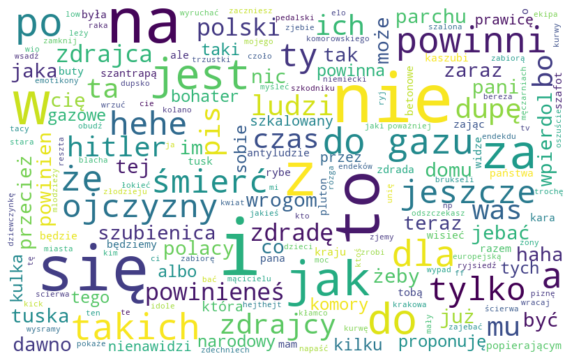

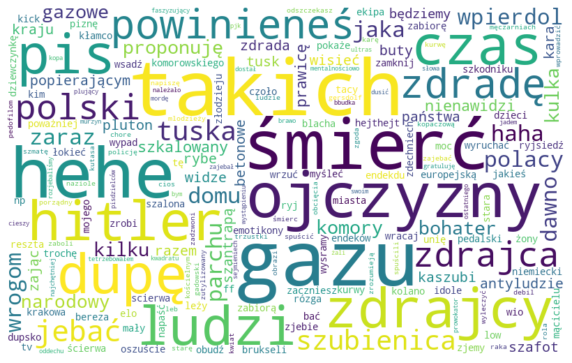

In [16]:
# visualizing which of the word is most commonly used in punishable threats 
kind_2 = conected_data[conected_data['Kind of offensive language']==2]
plot_word_cloud(kind_2)
plot_word_cloud(kind_2, stopwords=stopwords)

In [29]:
# present result for cleaned text
conected_data = pd.read_csv('cleaned_data.csv')
conected_data['Comment'] = clean_text_emoji(conected_data['Comment'])
kind_0 = conected_data[conected_data['Kind of offensive language']==0]
kind_1 = conected_data[conected_data['Kind of offensive language']==1]
kind_2 = conected_data[conected_data['Kind of offensive language']==2]
plot_word_cloud(kind_0)
plot_word_cloud(kind_1)
plot_word_cloud(kind_2)
count_plot_words(kind_0, 'język neutralny')
count_plot_words(kind_1, 'język obraźliwy')
count_plot_words(kind_2, 'groźby karalne')

TypeError: sequence item 71: expected str instance, float found

# Model

In [ ]:
data = split_train_val_test(visualization=True)

In [ ]:
data

In [ ]:
# present equal proportion group after split
percent = data.groupby(['Kind of offensive language', 'split']).count()
percent.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))